In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
print("libraries are imported")


libraries are imported


In [2]:
#Import Dataset
creditcard_df = pd.read_csv('Marketing_data.csv')

In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
#descriptive analysis
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
avr = creditcard_df.BALANCE.mean()
min = creditcard_df.BALANCE.min()
max = creditcard_df.BALANCE.max()
print(avr,min,max)


1564.4748276781006 0.0 19043.13856


In [10]:
#the features (row) of the customer who made the maximim "ONEOFF_PURCHASES"
creditcard_df[creditcard_df["ONEOFF_PURCHASES"]== creditcard_df.ONEOFF_PURCHASES.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [11]:
#features of the customer who made the maximum cash advance transaction
creditcard_df[creditcard_df["CASH_ADVANCE"]== creditcard_df.CASH_ADVANCE.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<AxesSubplot:>

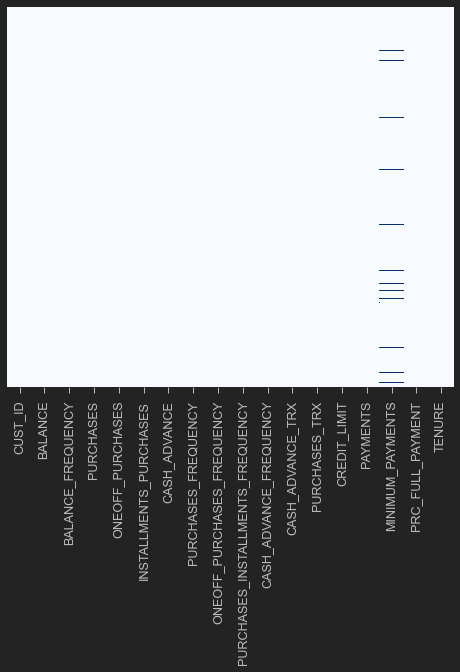

In [12]:
#Visualization And Exploration of The Dataset
#Missing values
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [13]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True)] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [15]:
# Fill up the missing elements with mean of the 'CREDIT LIMIT' 
creditcard_df.loc[(creditcard_df["CREDIT_LIMIT"].isnull() == True)] = creditcard_df["CREDIT_LIMIT"].mean()

<AxesSubplot:>

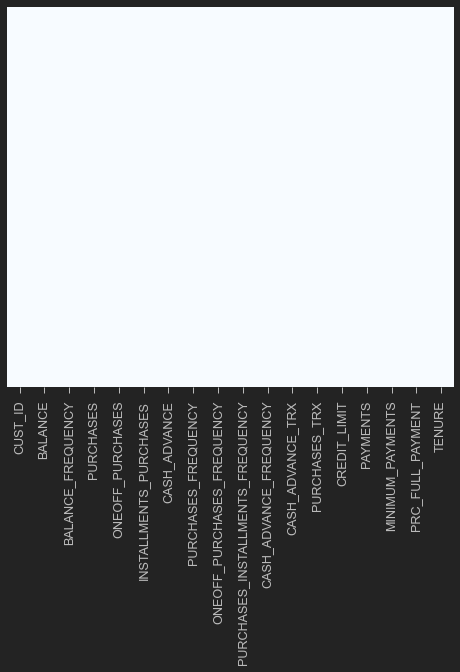

In [16]:
#check 
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [17]:
#Duplicate Values
creditcard_df.duplicated().sum()

312

In [18]:
# Drop ID column 'CUST_ID' 
creditcard_df.drop('CUST_ID', axis = 1 , inplace = True)

In [19]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

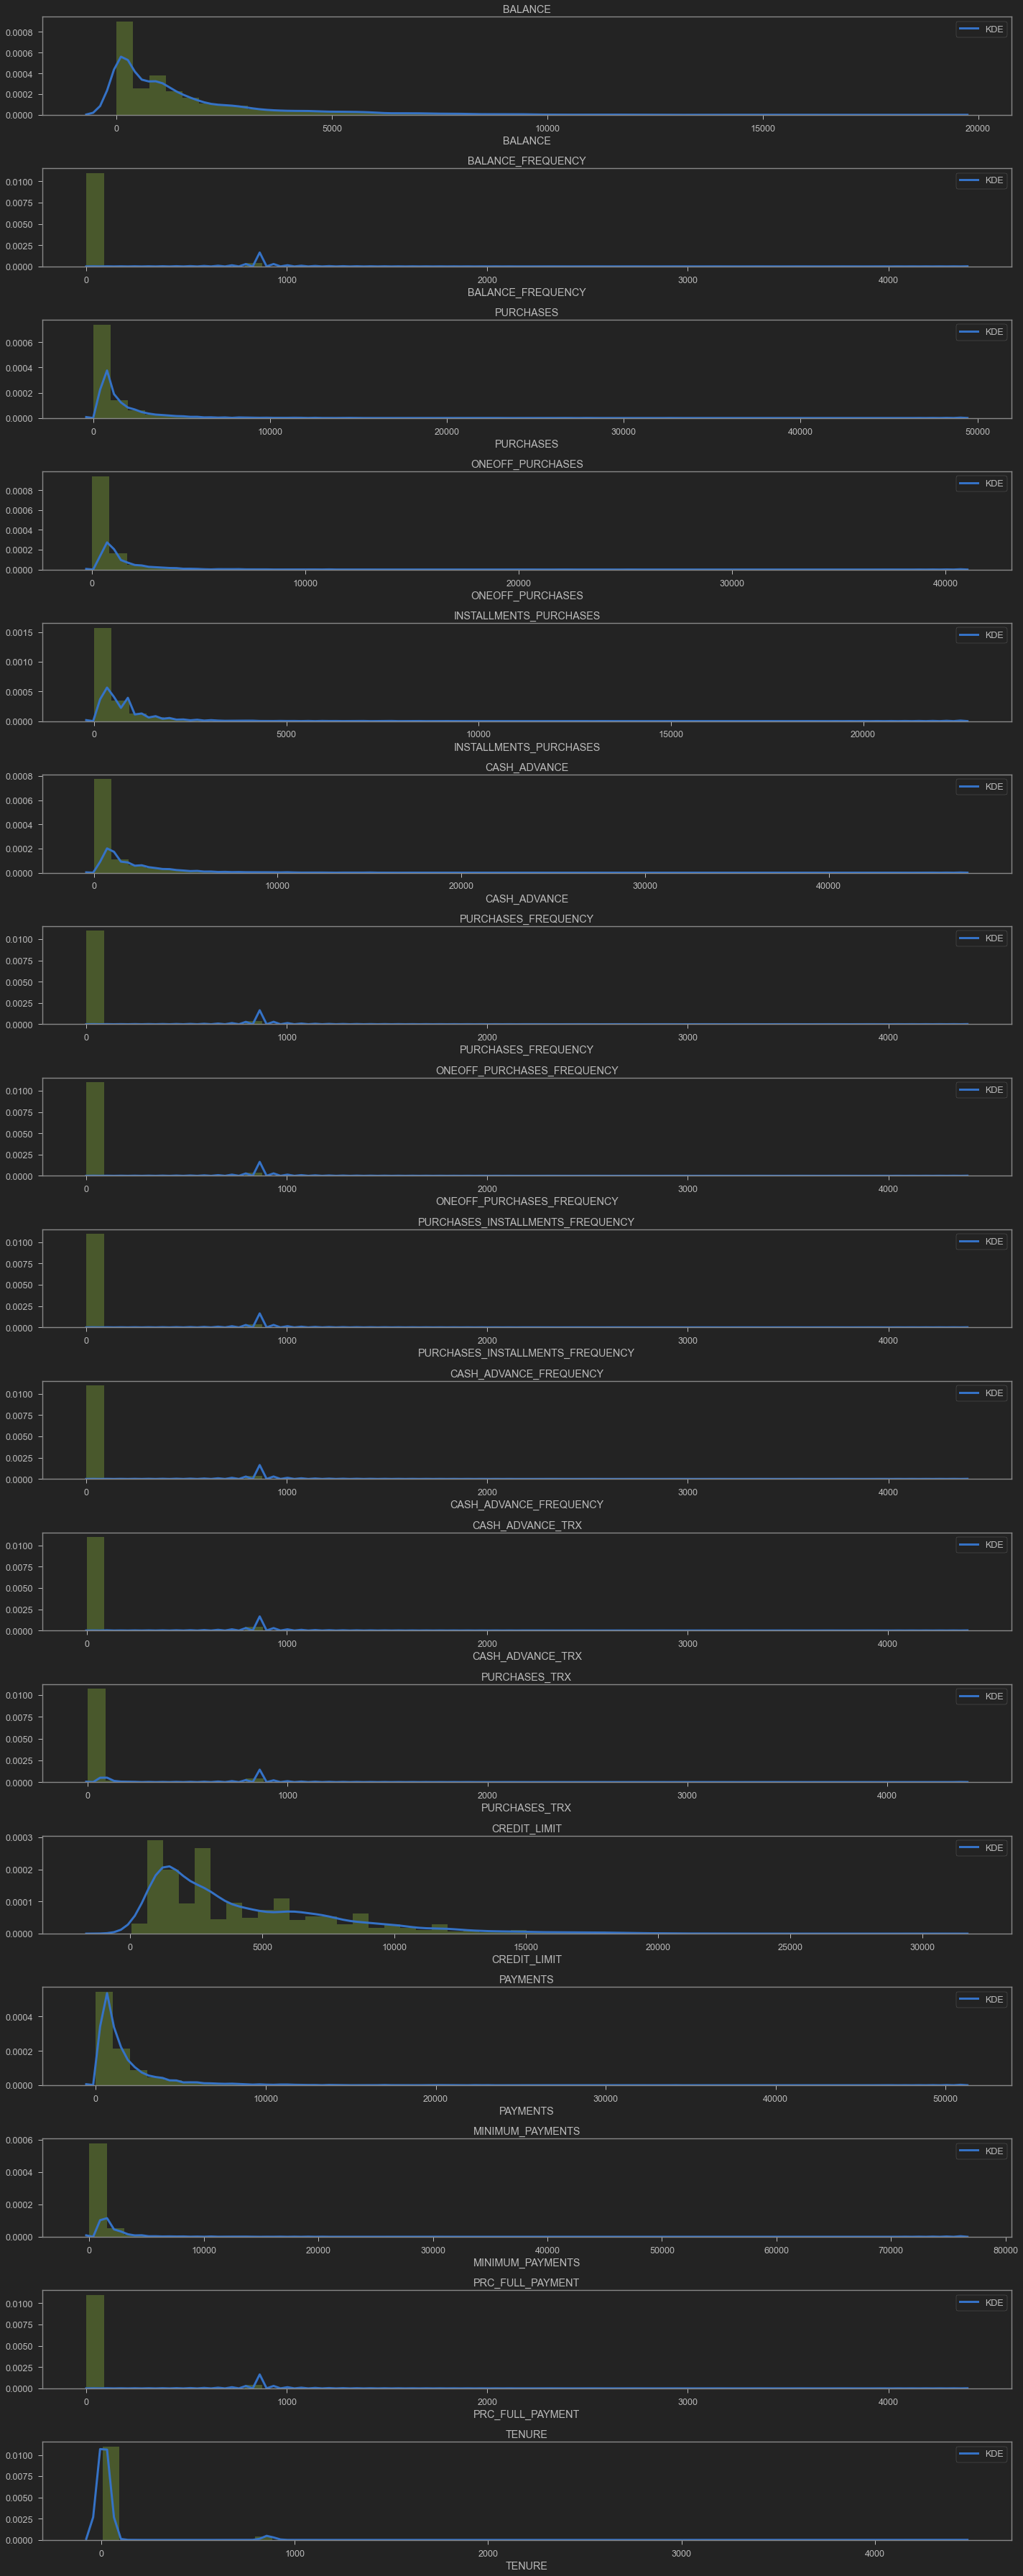

In [20]:
plt.figure(figsize=(20,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

<AxesSubplot:>

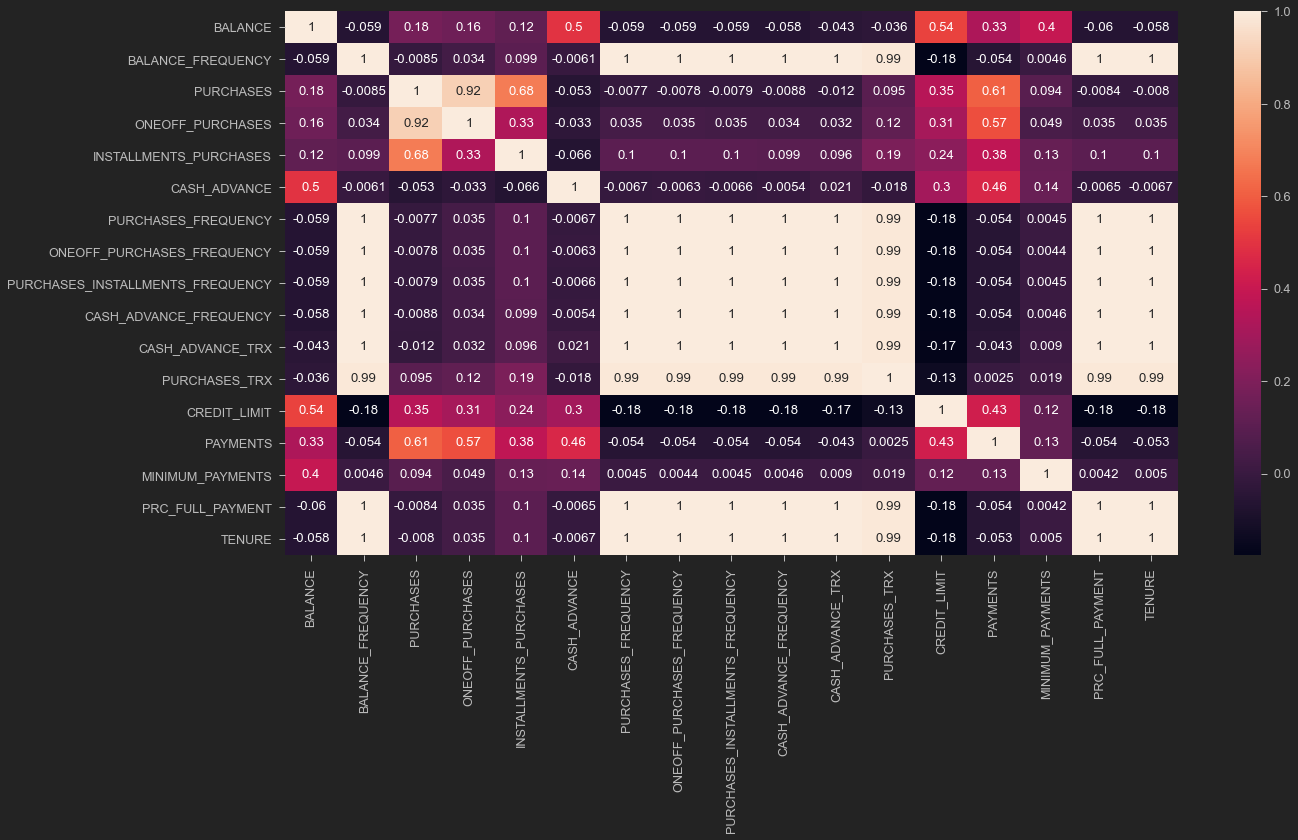

In [21]:
correlations = creditcard_df.corr()
f , ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations, annot = True)

In [23]:
# THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD
# scale the data 
scaler = StandardScaler()
creditcard_df_scaled =scaler.fit_transform(creditcard_df)

In [24]:
creditcard_df_scaled

array([[-0.74398498, -0.18623311, -0.43434157, ..., -0.31113997,
        -0.18673933, -0.18279332],
       [ 0.78850421, -0.1856827 , -0.4791485 , ...,  0.08908947,
        -0.18539496, -0.18279332],
       [ 0.44564949, -0.18513229, -0.11601041, ..., -0.10186087,
        -0.18673933, -0.18279332],
       ...,
       [-0.75246867, -0.18614138, -0.41132753, ..., -0.33563496,
        -0.18522691, -0.21954336],
       [-0.75728737, -0.18614138, -0.4791485 , ..., -0.34707456,
        -0.18522691, -0.21954336],
       [-0.5831498 , -0.18715045,  0.03432295, ..., -0.33311619,
        -0.18673933, -0.21954336]])

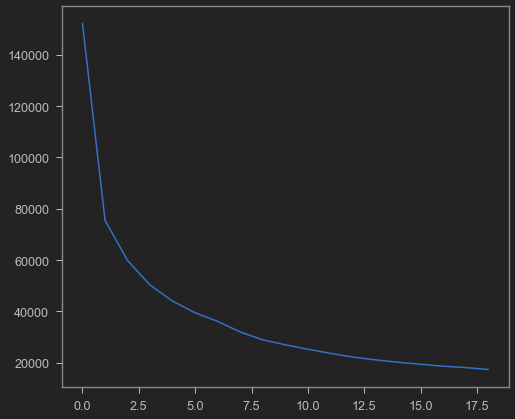

In [25]:
score_1 = []
range_values = range(1,20)

for i in range_values :
  kmeans=KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  score_1.append(kmeans.inertia_)


plt.plot(score_1 , 'bx-')


In [ ]:
#From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 


In [26]:
#KMEANS
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [27]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.404509,-0.185307,1.978451,1.602704,1.688398,-0.245260,-0.183222,-0.183146,-0.183513,-0.186225,-0.195290,0.109164,1.107903,1.169407,0.112366,-0.184924,-0.183319
1,-0.326206,-0.185881,-0.201590,-0.182634,-0.174003,-0.249357,-0.185872,-0.185994,-0.185871,-0.185975,-0.192459,-0.209675,-0.273315,-0.253040,-0.149323,-0.185732,-0.185950
2,-0.344908,5.041142,-0.073253,0.150893,0.471967,-0.060359,5.041280,5.041394,5.041327,5.041423,5.035970,4.978541,-0.965377,-0.310267,-0.000210,5.041411,5.036977
3,1.757049,-0.185371,-0.188089,-0.137163,-0.225637,1.666583,-0.186712,-0.186033,-0.186569,-0.184283,-0.137927,-0.211639,1.211544,0.743468,0.431681,-0.186555,-0.185282
4,1.830216,-0.185443,12.242126,12.314565,6.235090,0.239106,-0.183371,-0.182128,-0.183717,-0.186266,-0.191127,0.474763,3.272445,8.873209,1.002742,-0.183770,-0.183283
5,1.510760,-0.185219,0.128965,-0.215286,0.662536,0.265014,-0.185592,-0.186565,-0.185106,-0.185964,-0.182381,-0.133153,0.155972,0.097497,11.445361,-0.186739,-0.183277
6,1.366144,26.413165,1.584672,2.283056,4.369876,1.633279,26.404006,26.397426,26.401108,26.395893,26.446078,26.436747,0.000000,0.922568,1.514308,26.396365,26.657921


In [28]:
#inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2410.275410,0.971193,5232.560413,3267.781639,1965.806340,478.828988,0.917388,0.640410,0.742397,0.063424,1.713629,63.177642,8445.252680,5100.923412,1126.591636,3.001289e-01,11.914242
1,902.791085,0.876284,590.959528,312.029915,279.215974,470.290982,0.479397,0.169710,0.352654,0.104748,2.180456,10.727700,3394.764671,1028.063660,516.663774,1.665844e-01,11.484644
2,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,8.642065e+02,864.206542
3,5200.602065,0.960581,619.705758,387.309821,232.455982,4463.565487,0.340635,0.163305,0.237320,0.384450,11.171300,10.404484,8824.219323,3881.340047,1870.832577,3.039092e-02,11.593722
4,5351.546106,0.948727,27085.309200,21002.018800,6083.290400,1488.363253,0.892667,0.808667,0.708667,0.056667,2.400000,123.320000,16360.000000,27159.043527,3201.825604,4.907576e-01,11.920000
5,4692.501114,0.985646,1294.756579,257.971579,1036.785000,1542.362039,0.525718,0.075359,0.479067,0.106459,3.842105,23.315789,4964.473684,2031.748174,27540.847373,7.105427e-15,11.921053
6,4394.152953,4394.152953,4394.152953,4394.152953,4394.152953,4394.152953,4394.152953,4394.152953,4394.152953,4394.152953,4394.152953,4394.152953,4394.152953,4394.152953,4394.152953,4.394153e+03,4394.152953


In [ ]:
# Transactors cluster num 2: Those are customers who pay least amount of intrerest charges and careful with their money: Cluster with lowest balance ($864) 
# revolvers cluster num 3: who use credit card as a loan (most lucrative sector): highest balance  and highest cash advance , low purchase frequency, high cash advance frequency  high cash advance transactions  and low percentage of full payment 
# VIP/Prime cluster num 4: high credit limit and highest percentage of full payment, target for increase credit limit and increase spending habits
# cluster num 1 (low tenure): these are customers with low tenure (7 years), low balance 


In [34]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([1, 0, 1, ..., 1, 1, 1])

In [36]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.400000,0.000000,95.400000,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,2.000000,1000.000000,201.802084,139.509787,0.000000,12.000000,1
1,3202.467416,0.909091,0.000000,0.000000,0.000000,6442.945483,0.000000,0.000000,0.000000,0.250000,4.000000,0.000000,7000.000000,4103.032597,1072.340217,0.222222,12.000000,3
2,2495.148862,1.000000,773.170000,773.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,12.000000,7500.000000,622.066742,627.284787,0.000000,12.000000,1
3,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,864.206542,2
4,817.714335,1.000000,16.000000,16.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,1.000000,1200.000000,678.334763,244.791237,0.000000,12.000000,1
5,1809.828751,1.000000,1333.280000,0.000000,1333.280000,0.000000,0.666667,0.000000,0.583333,0.000000,0.000000,8.000000,1800.000000,1400.057770,2407.246035,0.000000,12.000000,1
6,627.260806,1.000000,7091.010000,6402.630000,688.380000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,64.000000,13500.000000,6354.314328,198.065894,1.000000,12.000000,0
7,1823.652743,1.000000,436.200000,0.000000,436.200000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,12.000000,2300.000000,679.065082,532.033990,0.000000,12.000000,1
8,1014.926473,1.000000,861.490000,661.490000,200.000000,0.000000,0.333333,0.083333,0.250000,0.000000,0.000000,5.000000,7000.000000,688.278568,311.963409,0.000000,12.000000,1
9,152.225975,0.545455,1281.600000,1281.600000,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,3.000000,11000.000000,1164.770591,100.302262,0.000000,12.000000,1


In [37]:
labels.max()

6

In [38]:
labels.min()

0

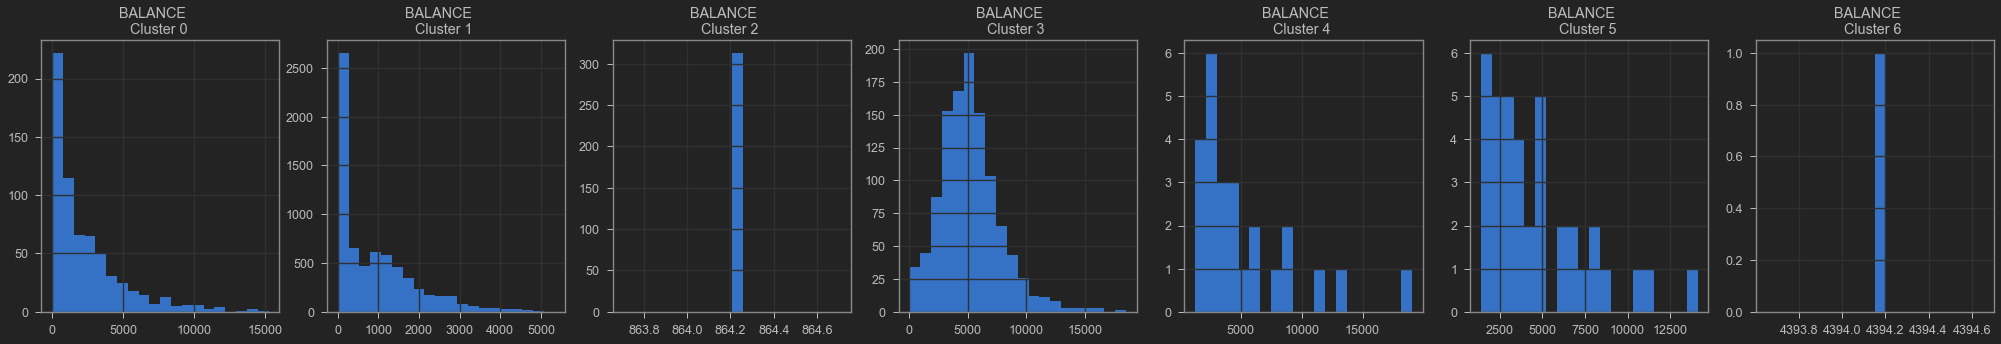

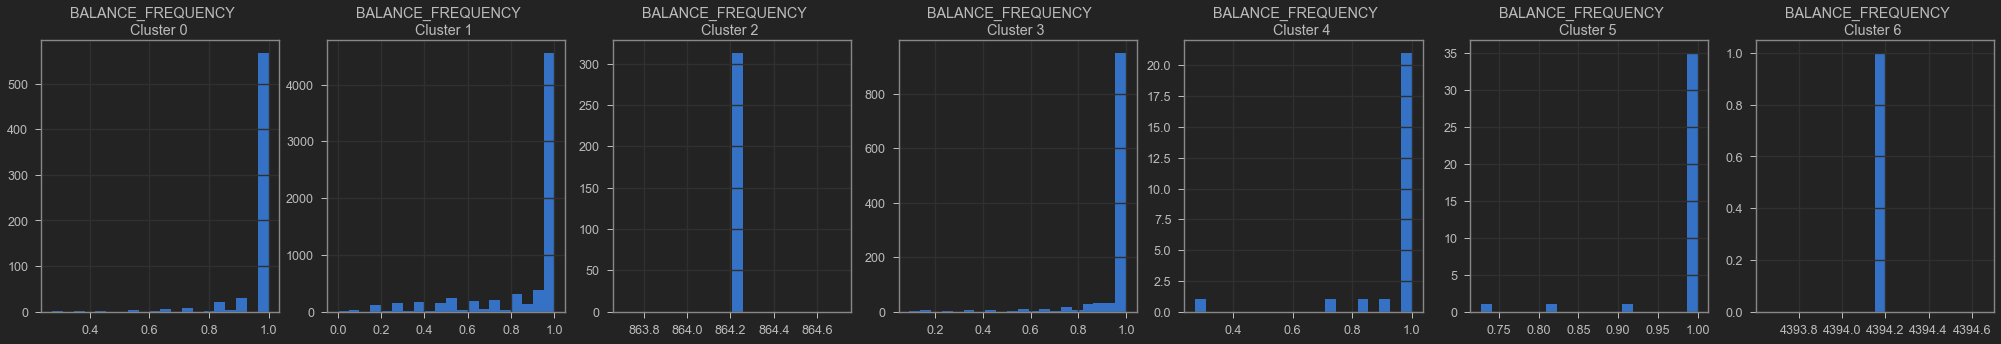

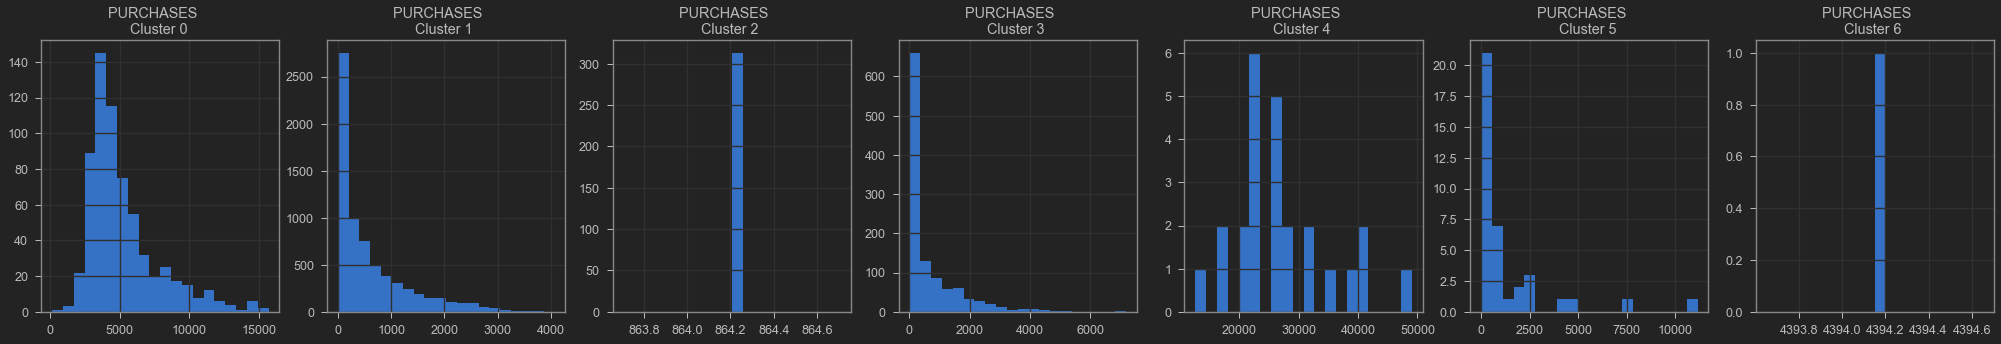

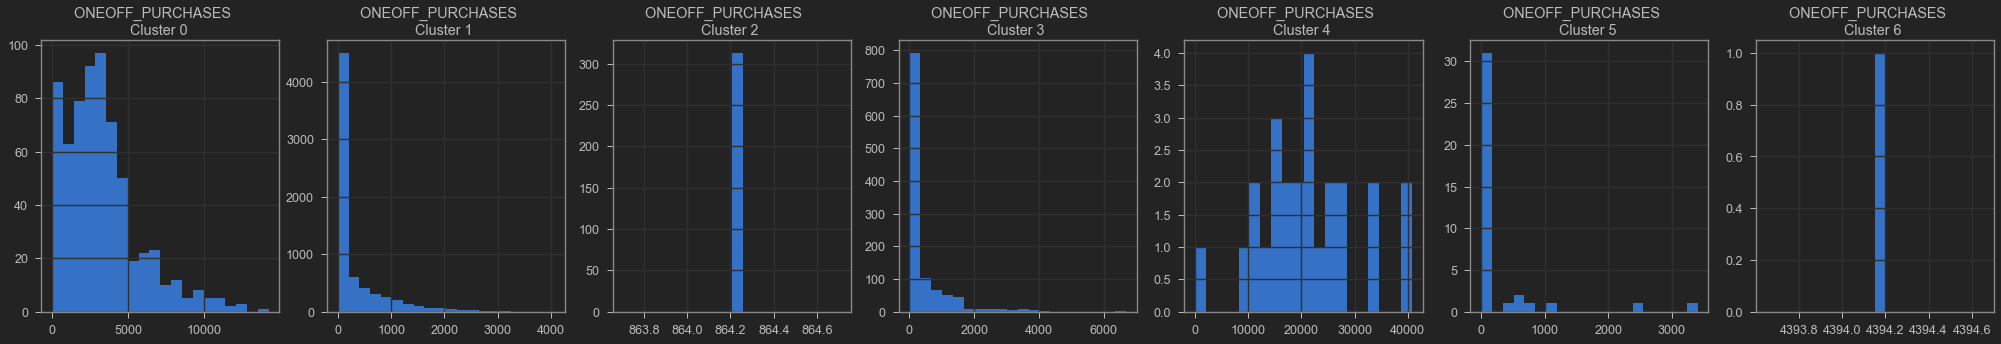

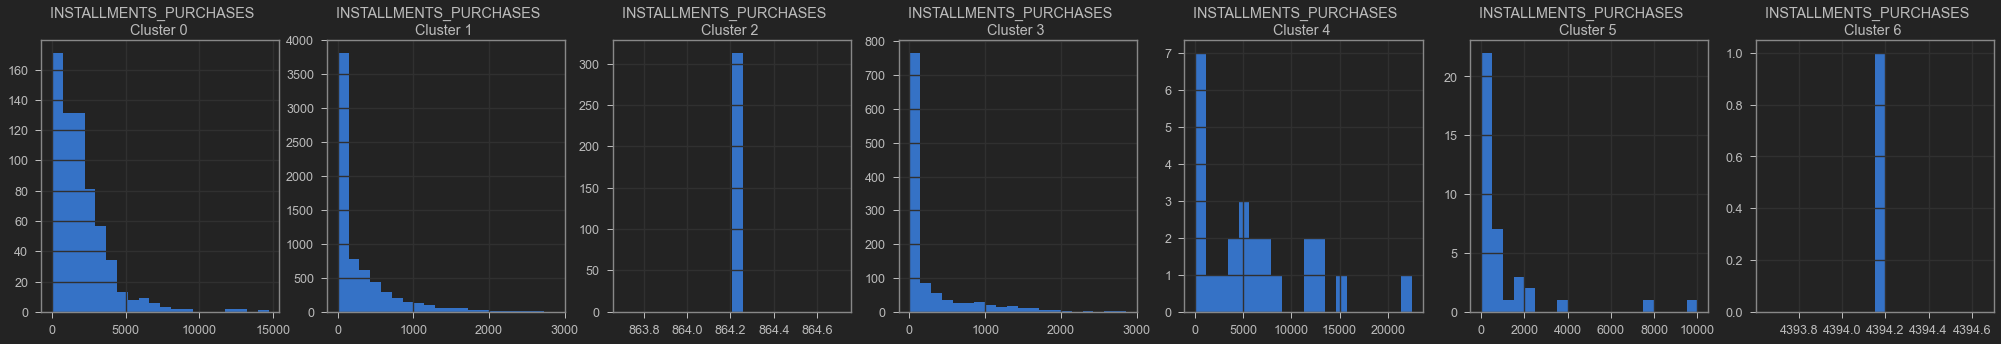

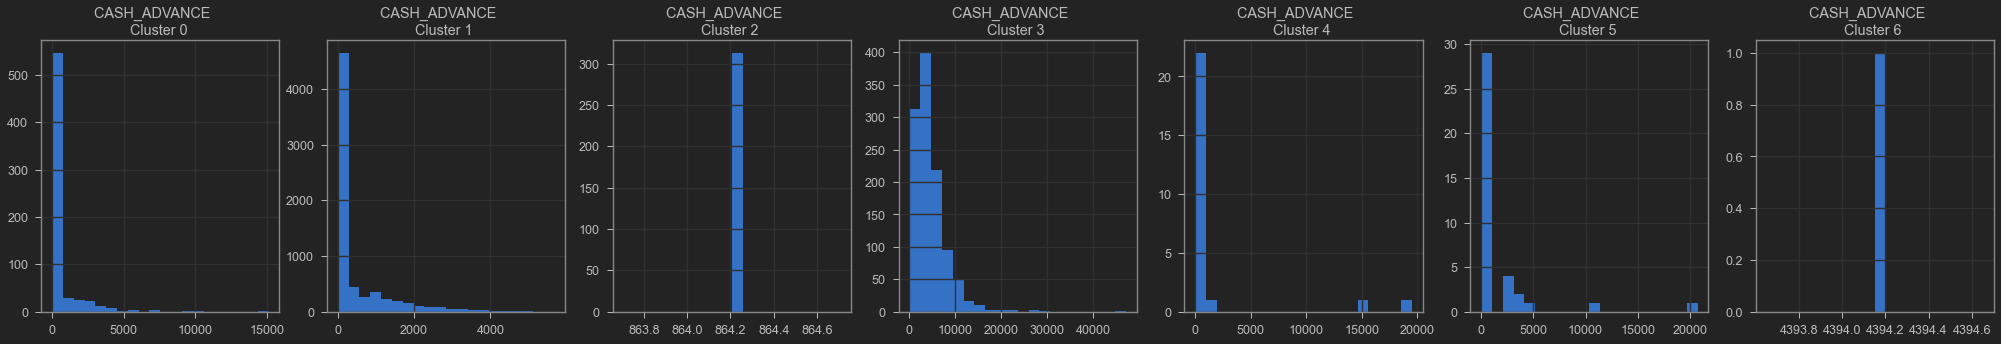

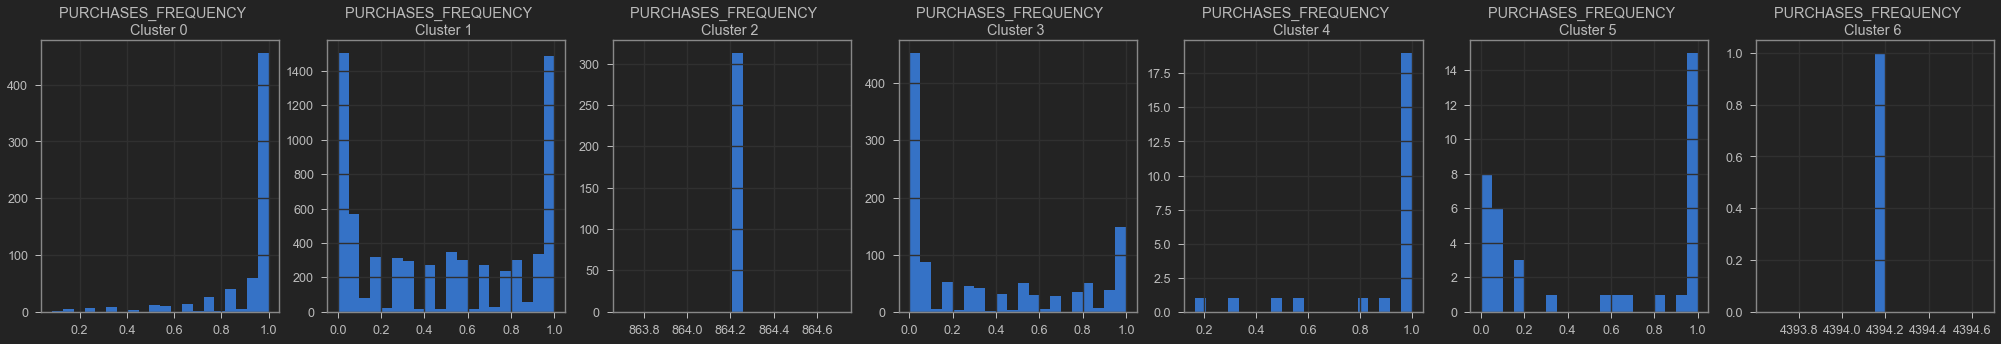

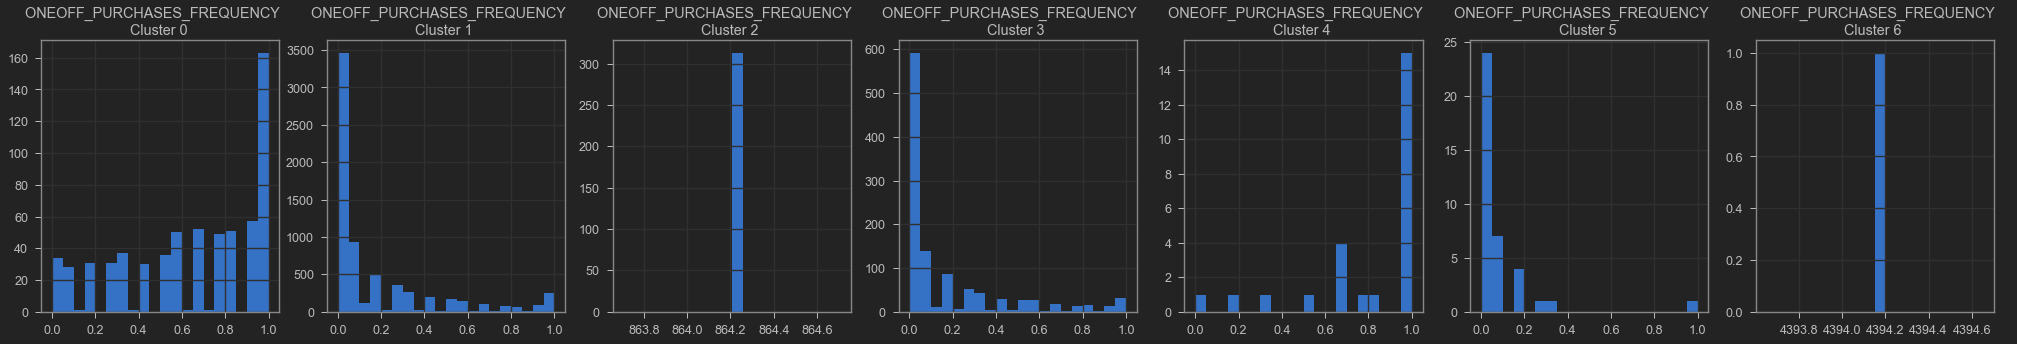

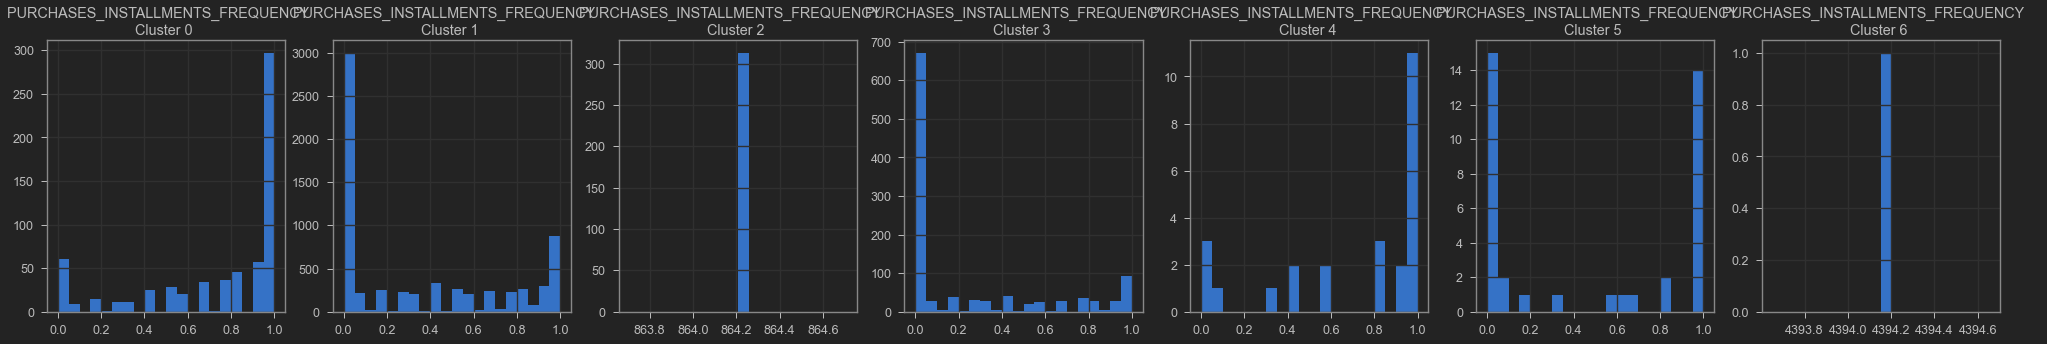

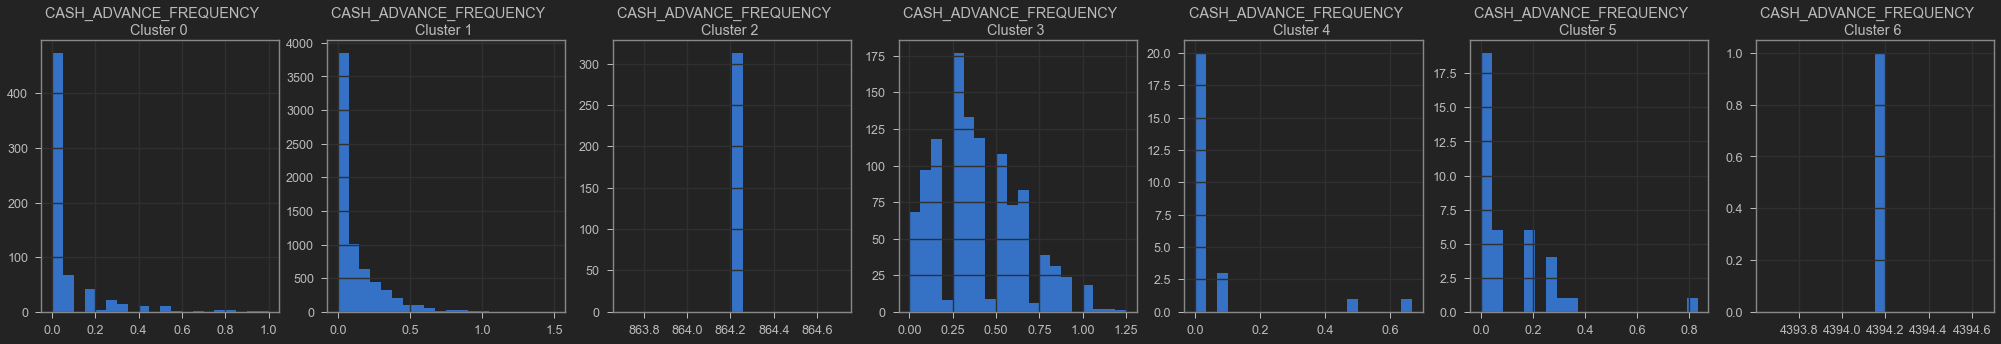

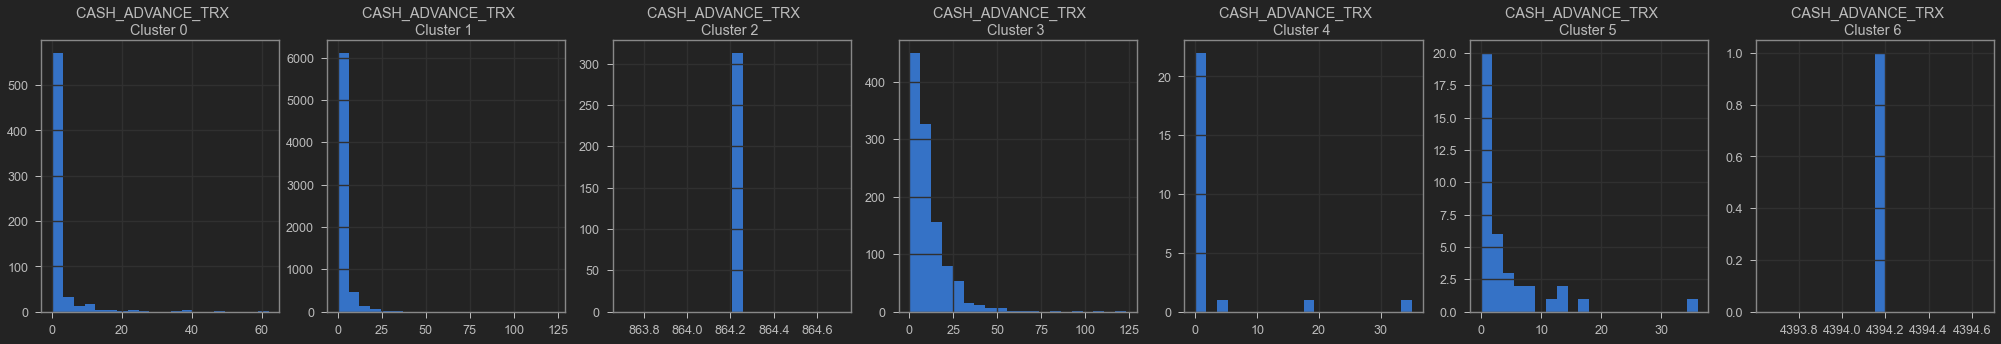

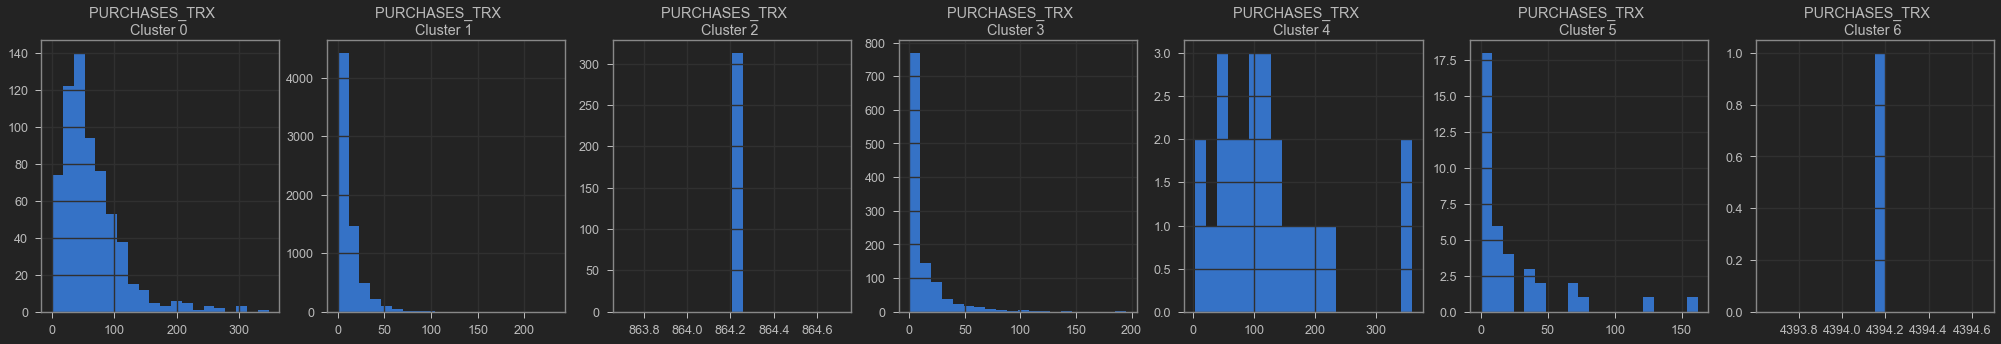

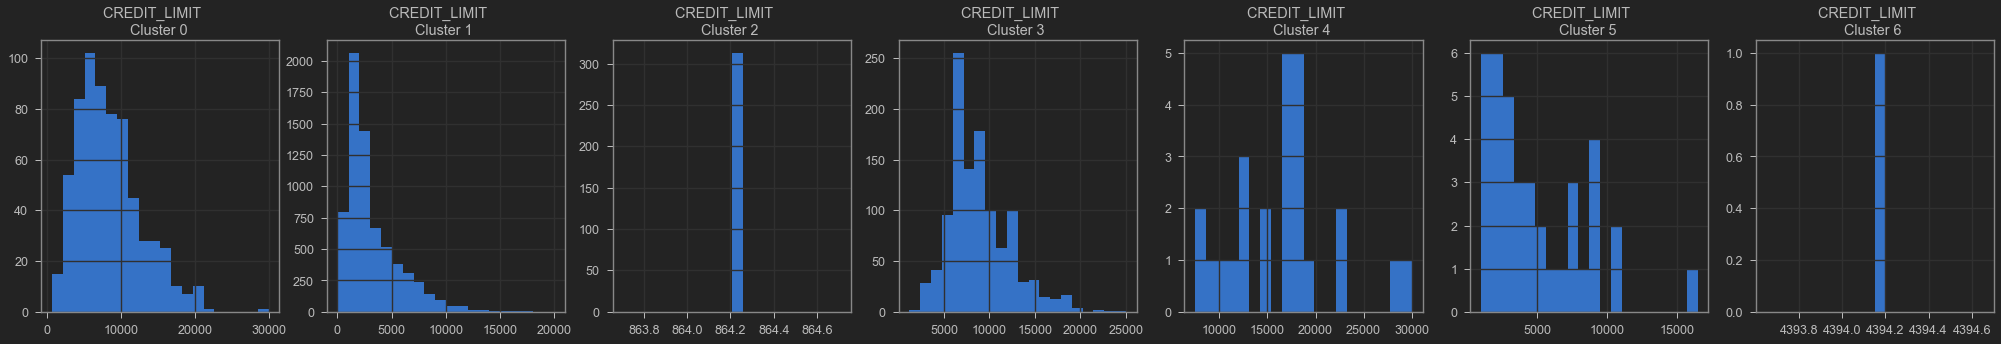

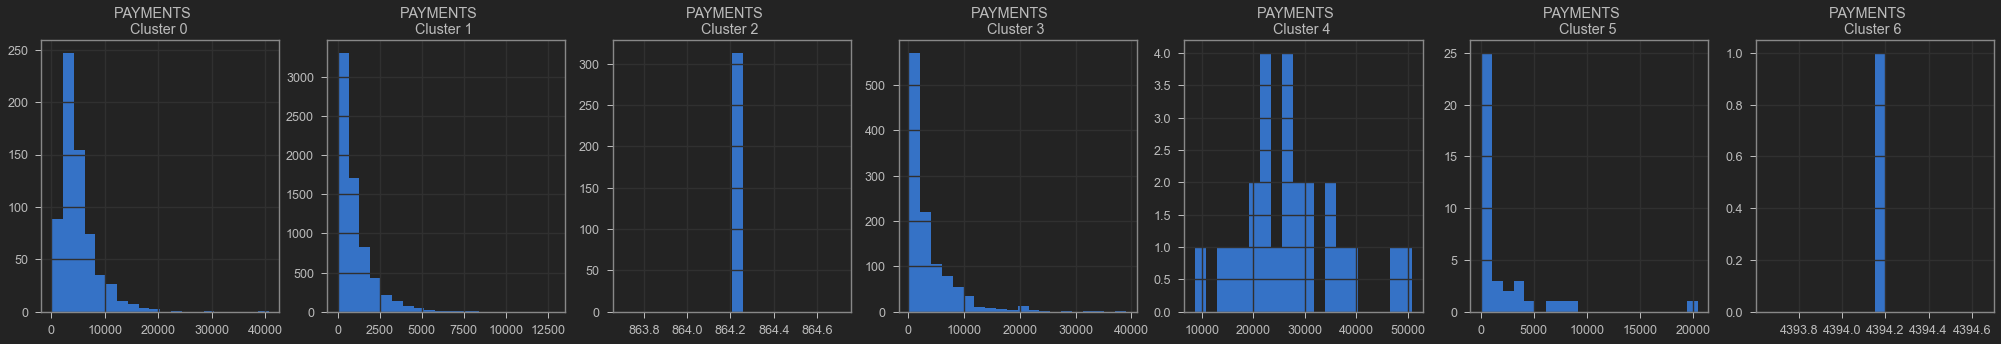

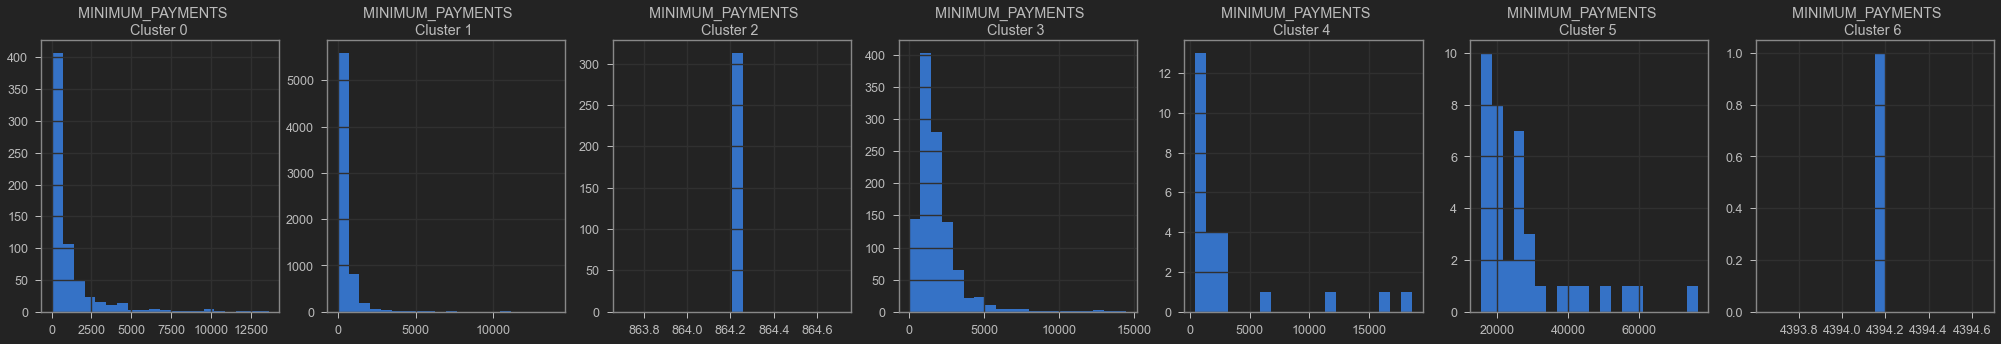

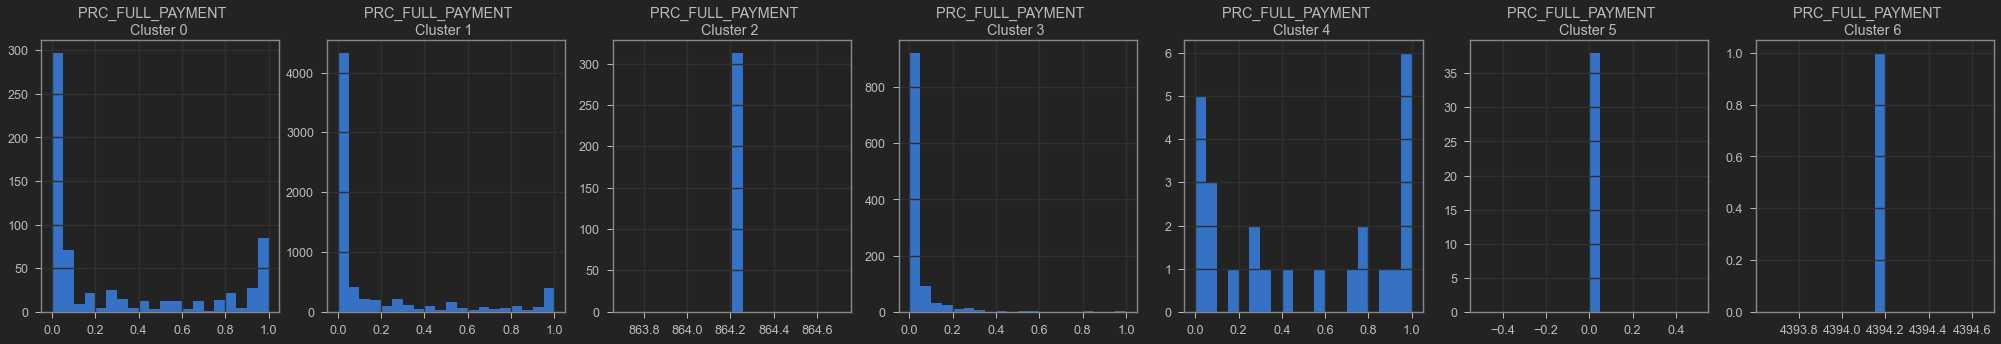

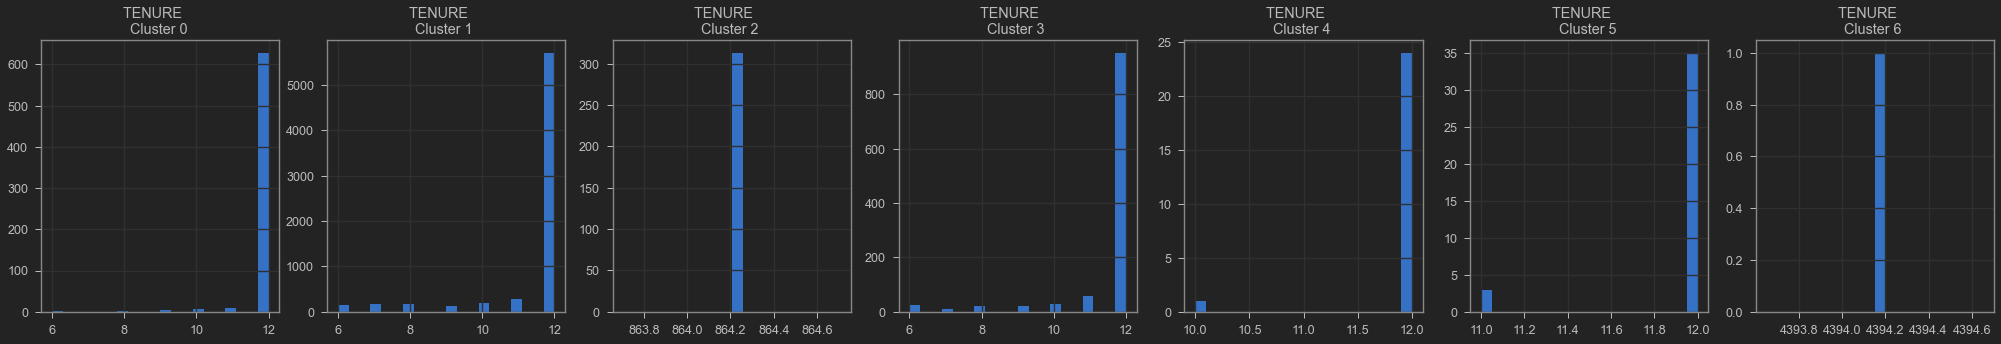

In [39]:
# histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()



In [40]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-0.5161933 , -1.43853425],
       [-0.70850478,  0.78597058],
       [-0.63741392, -0.03791549],
       ...,
       [-0.51624599, -1.43353487],
       [-0.52204498, -1.57424364],
       [-0.48146698, -0.90919144]])

In [46]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.516193,-1.438534
1,-0.708505,0.785971
2,-0.637414,-0.037915
3,15.145390,-0.086949
4,-0.538096,-1.274734


In [67]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head(10)

,pca1,pca2,cluster,cluster
0,-0.516193,-1.438534,1,1
1,-0.708505,0.785971,3,3
2,-0.637414,-0.037915,1,1
3,15.145390,-0.086949,2,2
4,-0.538096,-1.274734,1,1
5,-0.492077,-0.021364,1,1
6,-0.573539,4.275000,0,0
7,-0.525499,-0.746222,1,1
8,-0.620235,-0.248115,1,1
9,-0.692742,0.251375,1,1
